# **EDA - Exploratory Data Analysis**

In [4]:
import pandas as pd 
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path # manage paths for the project

In [5]:
# define the path of the data
data_path = Path('..') / 'data' / 'raw' / 'candidates.csv'

In [6]:
# first trouble, the data is not separated by comma, instead, it is separated 
# by semicolon so, the argument (sep='<separator>') allows indicate to pandas 
# the separation method

df_candidates_org = pd.read_csv(data_path, sep=';')
df_candidates_org

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


In [7]:
df_candidates_org.info()

# No null values

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   First Name                 50000 non-null  str  
 1   Last Name                  50000 non-null  str  
 2   Email                      50000 non-null  str  
 3   Application Date           50000 non-null  str  
 4   Country                    50000 non-null  str  
 5   YOE                        50000 non-null  int64
 6   Seniority                  50000 non-null  str  
 7   Technology                 50000 non-null  str  
 8   Code Challenge Score       50000 non-null  int64
 9   Technical Interview Score  50000 non-null  int64
dtypes: int64(3), str(7)
memory usage: 3.8 MB


In [8]:
# making a copy for temporal transformations

df_candidates = df_candidates_org.copy()
df_candidates

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


In [9]:
# to make easier the EDA process, all str values in df (including columns 
# names) were changed for their lowercase version 

df_candidates.columns = df_candidates.columns.str.lower()
df_candidates

,first name,last name,email,application date,country,yoe,seniority,technology,code challenge score,technical interview score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


In [10]:
text_colummns = df_candidates.select_dtypes(include=['object', 
                                                    'string']).columns

for column in text_colummns:
    if column != "email":
        df_candidates[column] = df_candidates[column].str.lower()
    
df_candidates.head()

,first name,last name,email,application date,country,yoe,seniority,technology,code challenge score,technical interview score
0,bernadette,langworth,leonard91@yahoo.com,2021-02-26,norway,2,intern,data engineer,3,3
1,camryn,reynolds,zelda56@hotmail.com,2021-09-09,panama,10,intern,data engineer,2,10
2,larue,spinka,okey_schultz41@gmail.com,2020-04-14,belarus,4,mid-level,client success,10,9
3,arch,spinka,elvera_kulas@yahoo.com,2020-10-01,eritrea,25,trainee,qa manual,7,1
4,larue,altenwerth,minnie.gislason@gmail.com,2020-05-20,myanmar,13,mid-level,social media community management,9,7


In [12]:
df_candidates.describe()

# Numerical values dont show out of range

,yoe,code challenge score,technical interview score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


In [ ]:
# To confirm that the numerical values are within expected ranges and 
# understand their distribution, we plot histograms. The almost uniform 
# distribution of scores suggests the data might be synthetically generated.

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_candidates["yoe"], 
            bins=15, ax=axes[0], 
            color="skyblue").set_title("Distribution of YOE")
sns.histplot(df_candidates["code challenge score"], 
            bins=10, ax=axes[1], 
            color="lightgreen").set_title("Code Challenge Score")
sns.histplot(df_candidates["technical interview score"], bins=10, ax=axes[2], 
            color="salmon").set_title("Technical Interview Score")

plt.tight_layout()
plt.show()

In [13]:
# now, in necessary verify the unique values for de categorical columns 

df_candidates["email"].unique()

# The “length” section indicates that only 49,833 records are unique.

<StringArray>
[       'leonard91@yahoo.com',        'zelda56@hotmail.com',
   'okey_schultz41@gmail.com',     'elvera_kulas@yahoo.com',
  'minnie.gislason@gmail.com',   'juanita_hansen@gmail.com',
   'alba_rolfson27@yahoo.com',   'madisen.zulauf@gmail.com',
   'dale_murazik@hotmail.com',       'dustin31@hotmail.com',
 ...
           'will36@yahoo.com',      'frank_klein@gmail.com',
  'hettie.koelpin1@gmail.com',        'josiane33@yahoo.com',
        'dangelo30@gmail.com', 'rocky_mitchell@hotmail.com',
   'dolores.roob@hotmail.com',  'savanah.stracke@gmail.com',
 'vivienne.fritsch@yahoo.com',  'abigayle.crooks@yahoo.com']
Length: 49833, dtype: str

In [14]:
# To decide what to do, it will be investigated whether these are data errors 
# or whether the context of the problem allows it 

# filter which columns that had emails duplicated
df_duplicated = df_candidates[df_candidates.duplicated(subset= ["email"])] 
df_duplicated

,first name,last name,email,application date,country,yoe,seniority,technology,code challenge score,technical interview score
1384,vernice,marquardt,selmer7@hotmail.com,2021-06-06,iraq,0,senior,game development,6,10
4676,keely,schowalter,brando.kub@yahoo.com,2019-08-12,antarctica (the territory south of 60 deg s),23,architect,social media community management,6,3
8605,mathilde,smitham,gertrude48@hotmail.com,2019-01-11,suriname,6,lead,adobe experience manager,5,0
10729,nicholaus,mayert,sandra83@gmail.com,2018-01-08,iraq,4,senior,technical writing,3,2
11027,lambert,dibbert,octavia58@gmail.com,2020-06-05,gibraltar,16,junior,adobe experience manager,2,1
...,...,...,...,...,...,...,...,...,...,...
49236,katlyn,moore,stephen39@yahoo.com,2018-03-29,guernsey,23,trainee,business analytics / project management,5,6
49819,kaylin,hills,alejandra17@hotmail.com,2019-02-24,iceland,21,architect,development - fullstack,2,9
49828,mozelle,o'connell,fiona72@hotmail.com,2019-12-08,montenegro,30,senior,development - frontend,7,5
49905,mark,rippin,callie59@hotmail.com,2022-01-26,bhutan,0,architect,security compliance,8,4


In [15]:
duplicated_emails = df_duplicated["email"].values
print(duplicated_emails)

<StringArray>
[    'selmer7@hotmail.com',    'brando.kub@yahoo.com',
  'gertrude48@hotmail.com',      'sandra83@gmail.com',
     'octavia58@gmail.com',    'jovani24@hotmail.com',
 'carolyne.okon@gmail.com',    'madeline12@gmail.com',
    'brooks60@hotmail.com',     'valerie55@gmail.com',
 ...
        'merl96@gmail.com',   'georgiana68@yahoo.com',
       'april11@gmail.com',      'vern44@hotmail.com',
      'easter75@gmail.com',     'stephen39@yahoo.com',
 'alejandra17@hotmail.com',     'fiona72@hotmail.com',
    'callie59@hotmail.com',      'esteban3@yahoo.com']
Length: 167, dtype: str


In [12]:
# run this celd if you wanna see all records
pd.set_option('display.max_rows', None)

In [15]:
# run this celd if you dont wanna see all records
pd.reset_option('display.max_rows')

In [17]:
df_candidates[df_candidates["email"].isin(duplicated_emails)].sort_values(
                                                                by="email")

,first name,last name,email,application date,country,yoe,seniority,technology,code challenge score,technical interview score
15823,herta,bartoletti,abbigail94@yahoo.com,2022-02-20,dominican republic,21,mid-level,client success,5,8
31764,gavin,brakus,abbigail94@yahoo.com,2019-07-27,croatia,4,junior,devops,6,2
21805,jayce,blick,addison_bode@hotmail.com,2019-08-27,luxembourg,4,lead,development - backend,7,2
32069,malika,krajcik,addison_bode@hotmail.com,2019-02-02,lithuania,24,architect,database administration,10,3
41691,lorine,howe,alberta95@gmail.com,2019-05-28,afghanistan,21,junior,adobe experience manager,7,2
...,...,...,...,...,...,...,...,...,...,...
14135,malcolm,mante,wilhelm76@hotmail.com,2018-11-30,czech republic,9,lead,security compliance,3,4
43614,katlynn,brown,winston14@hotmail.com,2020-02-14,morocco,17,senior,mulesoft,0,8
13653,clarissa,rogahn,winston14@hotmail.com,2022-07-04,brunei darussalam,25,architect,qa manual,7,0
34827,edgardo,kohler,zachery86@yahoo.com,2022-06-13,madagascar,24,junior,data engineer,0,0


In [18]:
# While it is true that other contact details (such as a phone number) could 
# be used to uniquely identify a candidate, the fact that the same email 
# address is associated with more than one person, from a data quality 
# perspective, would pose a risk to the reliability of that data. This could 
# be due to fraud or identity theft, an error in the data collection system 
# (such as a faulty web form), or corrupted data at source. Doubtful data s
# hould not be entered into the data warehouse. Therefore, all records with the
# same email address will be deleted.

df_candidates.drop_duplicates(subset=['email'], keep=False)


,first name,last name,email,application date,country,yoe,seniority,technology,code challenge score,technical interview score
0,bernadette,langworth,leonard91@yahoo.com,2021-02-26,norway,2,intern,data engineer,3,3
1,camryn,reynolds,zelda56@hotmail.com,2021-09-09,panama,10,intern,data engineer,2,10
2,larue,spinka,okey_schultz41@gmail.com,2020-04-14,belarus,4,mid-level,client success,10,9
3,arch,spinka,elvera_kulas@yahoo.com,2020-10-01,eritrea,25,trainee,qa manual,7,1
4,larue,altenwerth,minnie.gislason@gmail.com,2020-05-20,myanmar,13,mid-level,social media community management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,bethany,shields,rocky_mitchell@hotmail.com,2022-01-09,dominican republic,27,trainee,security,2,1
49996,era,swaniawski,dolores.roob@hotmail.com,2020-06-02,morocco,21,lead,game development,1,2
49997,martin,lakin,savanah.stracke@gmail.com,2018-12-15,uganda,20,trainee,system administration,6,1
49998,aliya,abernathy,vivienne.fritsch@yahoo.com,2020-05-30,czech republic,20,senior,database administration,0,0


In [ ]:
# Verifying the date range

print(f"fecha inicial: {df_candidates['application date'].min()}")
print(f"fecha final: {df_candidates['application date'].max()}")

# Theres no dates out of range

fecha inicial: 2018-01-01
fecha final: 2022-07-04


In [19]:
df_candidates["country"].unique()

# 244 unique countries were identified, which exceeds the 195 sovereign states.
# This is due to the inclusion of dependent territories (e.g., Cocos Islands) 
# according to the ISO standard. For this exercise, they will be assumed as 
# valid geographic locations for candidates.

<StringArray>
[               'norway',                'panama',               'belarus',
               'eritrea',               'myanmar',              'zimbabwe',
     'wallis and futuna',                 'italy',           'timor-leste',
               'armenia',
 ...
               'georgia',           'switzerland',              'suriname',
               'hungary',                 'gabon', 'sao tome and principe',
               'mayotte',                 'benin',                'uganda',
               'romania']
Length: 244, dtype: str

In [20]:

# * However, a small verification will be implemented with the help of the 
# * pycountry library.

for country in df_candidates["country"]:
    try:
        country = pycountry.countries.get(name=country)
    except LookupError:
        print(country)
        
# ! All countries are valid.

In [21]:

# ? Consideration is being given to reducing the number of categories to 
# ? facilitate analysis (e.g., “inter” and “trainee”). 

df_candidates["seniority"].unique()

<StringArray>
['intern', 'mid-level', 'trainee', 'junior', 'lead', 'architect', 'senior']
Length: 7, dtype: str

In [22]:
# One finding was that there were records with a YOE of 27 but whose seniority
# was trainee. It is understood that the data was generated synthetically, but 
# in a real context, years of experience are correlated with seniority. During 
# the transformation stage, logic will be implemented to recalculate seniority 
# based on years of experience. 

# TODO: in the transformation phase, change values of seniority by the yoe values

df_candidates[(df_candidates["yoe"]>25) & (df_candidates["seniority"] == "intern")]

# there is 1209 candidates with an "intern" seniority and more than 25 yoe, 
# don't make sense in this context


,first name,last name,email,application date,country,yoe,seniority,technology,code challenge score,technical interview score
37,grayce,boyer,matilda17@gmail.com,2019-01-07,taiwan,27,intern,development - fullstack,8,0
114,beverly,sipes,emelie.dicki70@gmail.com,2018-10-01,burkina faso,30,intern,security,9,0
226,curtis,bartoletti,javonte86@gmail.com,2018-09-23,thailand,27,intern,mulesoft,0,6
237,favian,zieme,cordie.prohaska@gmail.com,2018-03-09,haiti,29,intern,system administration,4,8
282,emerald,franecki,ramon.grady@gmail.com,2020-08-27,guatemala,30,intern,development - cms frontend,9,8
...,...,...,...,...,...,...,...,...,...,...
49789,kelsie,lind,olga_hodkiewicz@gmail.com,2022-03-30,iraq,26,intern,devops,1,5
49841,kali,bahringer,federico26@gmail.com,2020-06-14,russian federation,26,intern,security,8,3
49914,emory,gerhold,missouri86@yahoo.com,2019-04-01,gibraltar,27,intern,development - cms backend,4,4
49939,peggie,durgan,jayden40@yahoo.com,2019-12-09,french polynesia,28,intern,development - frontend,3,9


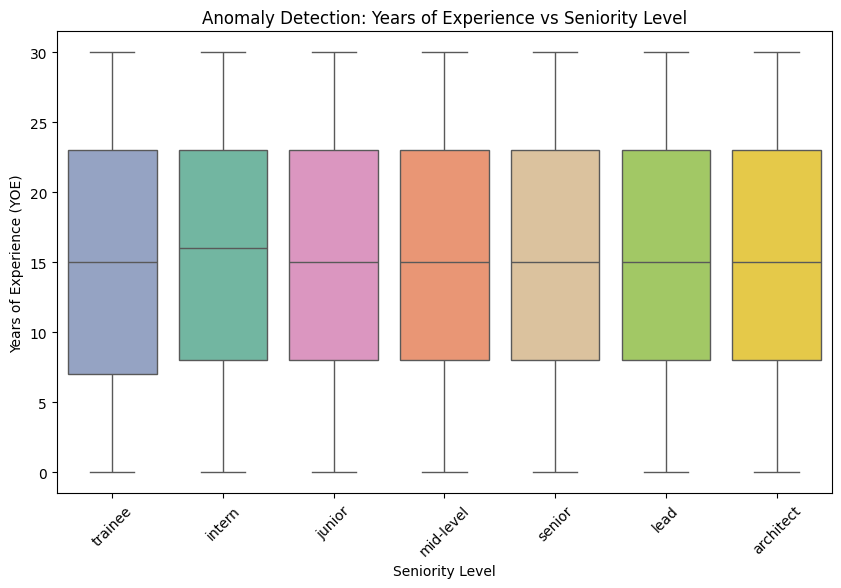

In [24]:
# To understand the internal consistency of the profiles, we cross-reference 
# Years of Experience (YOE) with Seniority Level. The plot below reveals a 
# critical anomaly: the distribution boxes are virtually identical for all 
# roles (from Intern to Architect). This proves a lack of correlation and 
# justifies the need for a transformation rule in the ETL process to 
# recalculate Seniority based on YOE.

plt.figure(figsize=(10, 6))
# Define a logical order for the x-axis based on the unique values
order = ["trainee", "intern", "junior", "mid-level", "senior", "lead", 
        "architect"]

sns.boxplot(data=df_candidates, x="seniority", y="yoe", order=order, 
        hue="seniority", palette="Set2", legend=False)

plt.title("Anomaly Detection: Years of Experience vs Seniority Level")
plt.xlabel("Seniority Level")
plt.ylabel("Years of Experience (YOE)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Nothing to do here

df_candidates["technology"].unique()

<StringArray>
[                          'data engineer',
                          'client success',
                               'qa manual',
       'social media community management',
                'adobe experience manager',
                                   'sales',
                                'mulesoft',
                                  'devops',
               'development - cms backend',
                              'salesforce',
                   'system administration',
                                'security',
                        'game development',
              'development - cms frontend',
                     'security compliance',
                   'development - backend',
                                  'design',
 'business analytics / project management',
                  'development - frontend',
                 'development - fullstack',
                   'business intelligence',
                 'database administration',
                  

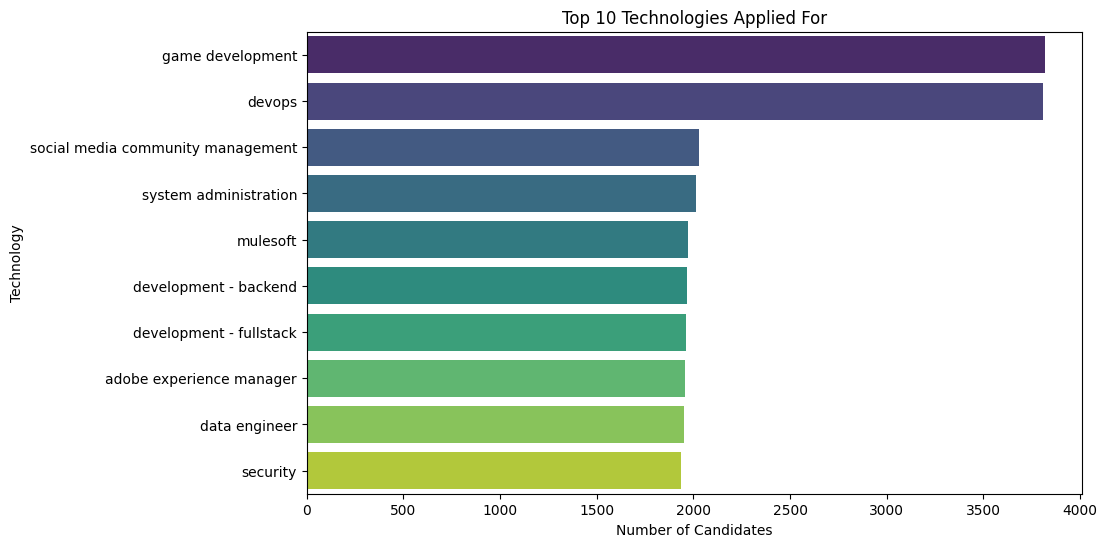

In [25]:
# Given the high cardinality of the technology column, we identify the top 10 
# most frequent profiles to understand the volume and focus of the candidate 
# pool.

plt.figure(figsize=(10, 6))

top_tech = df_candidates["technology"].value_counts().head(10)
sns.barplot(x=top_tech.values, y=top_tech.index, hue=top_tech.index, 
            palette="viridis", legend=False)

plt.title("Top 10 Technologies Applied For")
plt.xlabel("Number of Candidates")
plt.ylabel("Technology")
plt.show()

In [ ]:
# In a real context, usually a candidate with a high score 
# in code tends to have a lower score in the interview. Since the data is 
# synthetic, there should be no correlation, so with the code below we should 
# see a number close to 0.

df_candidates[['code challenge score', 'technical interview score']].corr()

,code challenge score,technical interview score
code challenge score,1.000000,-0.002373
technical interview score,-0.002373,1.000000


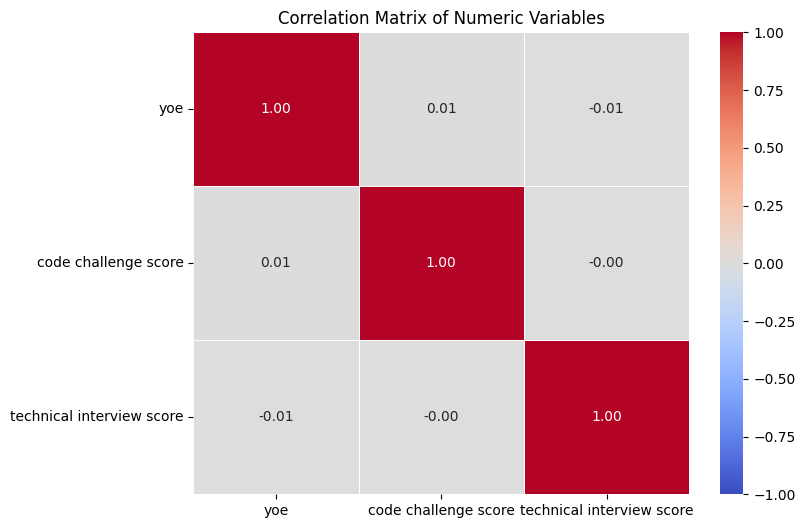

In [ ]:
# To understand if there is any underlying relationship between our 
# numeric variables (Years of Experience, Code Challenge Score, and Technical 
# Interview Score), a correlation matrix was generated. In a synthetic dataset, 
# its expected that these values to be close to 0, indicating a lack of 
# correlation.

plt.figure(figsize=(8, 6))

# Select only numeric columns for correlation
numeric_cols = ["yoe", "code challenge score", "technical interview score"]
correlation_matrix = df_candidates[numeric_cols].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix of Numeric Variables")
plt.show()